## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Helper Functions

In [2]:
#to vualize the decision tree of scikit learn model
from util import visualize_tree_boundries

In [3]:
def plot2D(X, y, feature_names, target_names, title=None,vertical_boundry=0, horizontal_boundry=0):
    colors = ['red', 'blue', 'orange']
    markers = ['d', 'o', 'x']
    plt.figure(figsize=(6, 4))
    if y is None:
        plt.scatter(X[:, 0], X[:, 1])
    else: 
        for i, target_name in enumerate(target_names):
            color=colors[i % len(colors)]
            marker=markers[i % len(markers)]
            plt.scatter(X[y == i, 0], X[y == i, 1], label=f"{target_name} - Label {i}", color=color, marker=marker)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.legend()
    plt.axvline(x=vertical_boundry, color='red', linestyle='--')
    plt.axhline(y=horizontal_boundry, color='blue', linestyle='--')

    plt.xlim(left=0)
    plt.ylim(bottom=0)
    
    plt.show()



## Load Data

In [4]:
#read data.csv file and separate by comma with pandas read_csv function
df = pd.read_csv('data.csv', sep=',')
print(df)

     Length(cm)  Weigtht(kg)  Label
0     44.150353     3.101280      0
1     37.406146     3.345313      0
2     46.719283     2.991017      0
3     48.366514     3.277788      0
4     58.057526     3.215898      0
..          ...          ...    ...
263   68.237261     2.258385      0
264   54.803322     1.954143      0
265   59.315126     2.221807      0
266   59.758443     2.684642      0
267   60.464937     2.779701      0

[268 rows x 3 columns]


In [5]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
print(X)
print(y)

target_names = ['diamondfin', 'bubblefish', 'crosstail']
feature_names = ['Length(cm)', 'Weight(kg)']

[[ 44.15035319   3.10127958]
 [ 37.40614581   3.34531255]
 [ 46.71928272   2.99101715]
 [ 48.3665144    3.27778821]
 [ 58.05752558   3.2158982 ]
 [ 46.12781311   3.4323206 ]
 [ 38.98279033   3.08680559]
 [ 30.72108136   2.36361568]
 [ 38.43753369   3.16244641]
 [ 39.92691357   2.81305473]
 [ 49.54631558   2.8810694 ]
 [ 39.01748794   2.6463881 ]
 [ 36.05689276   2.41302671]
 [ 47.09330727   2.69707313]
 [ 46.92269069   2.90896224]
 [ 43.7055018    2.3848693 ]
 [ 46.41779292   2.82979473]
 [ 40.12909527   2.51770798]
 [ 58.475104     2.83847037]
 [ 53.77985643   2.54705653]
 [ 53.91038112   2.34135704]
 [ 48.4280066    1.95771891]
 [ 42.10169191   2.69536962]
 [ 49.95667206   2.20038912]
 [ 46.2103093    2.0184415 ]
 [ 57.46890375   2.65749871]
 [ 46.10920054   2.93263796]
 [ 60.61465201   2.98368783]
 [ 52.63993702   2.72802328]
 [ 56.84422781   3.1979003 ]
 [ 60.84628413   3.35927899]
 [ 46.6751882    2.20179014]
 [ 62.84853317   2.60462569]
 [ 51.0719681    2.79280369]
 [ 50.56167588

## Review on Machine Learning Process



<div style="text-align: center;">
    <img src="./assets/ml_flow.webp" width="400" height="450" />
</div>

### Plot X and y scatter plot 

#### Note: use `plot2D` helper function

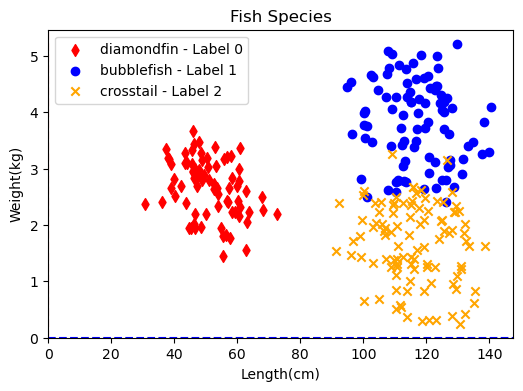

In [6]:
#your code here
plot2D(X, y, feature_names, target_names, title='Fish Species')

# 1. Intuition behind decision tree

<img src="./assets/decisiontree_visual.jpg" width="600" hight="200" /> 

### High level instructions

#### - Split Data to train and test with  `test_size=0.3`
#### - Plot the Training Data and identify `decision boundries` 

#### use use `plot2D` helper function and decide on `Decision Boundaries` value by looking the at data and set `length_threshold` and `weight_threshold` accordingly


#### - Display Training Data and Decision Boundaries on the same plot 

#### use `plot2D` helper function and pass the `length_threshold` for `vertical_boundry` and `weight_threshold` for `horizontal_boundry` arguments

#### - Write the logic of your decision tree with `if-else` statements


In [7]:
#your code here 
# 1 - split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

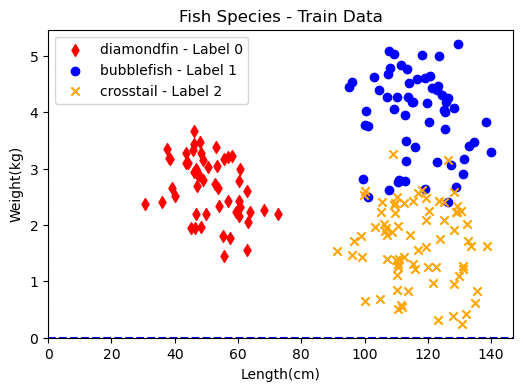

In [8]:
#your code here
# 2- plot the train data
plot2D(X_train, y_train, feature_names, target_names, title='Fish Species - Train Data')

In [9]:
#your code here 
#replace 0 with the length_threshold and weight_threshold values
length_threshold = 75
weight_threshold = 2.5

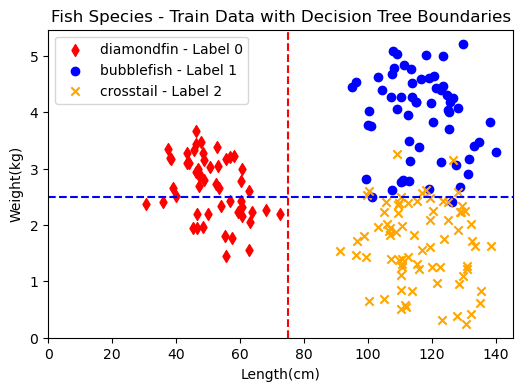

In [10]:
#your code here
# 3- plot train data with the decision tree boundaries on the same plot
# Draw vertical line at length_threshold and horizontal line at weight_threshold
plot2D(X_train, y_train, feature_names, target_names, title='Fish Species - Train Data with Decision Tree Boundaries', vertical_boundry=length_threshold, horizontal_boundry=weight_threshold)

In [11]:
#your code here
# 4- Write the logic of your decision tree with `if-else` statements
def my_decision_tree(X_new):
    """
    X_new: a new data set (such as X_test), composing some data points with 2 features
    X_new shape: (n_samples, 2)
    """
    y_pred = []
    for index, datapoint in enumerate(X_new):
        if datapoint[0] < length_threshold:
            prediction = 0
        else: 
            if datapoint[0] > weight_threshold:
                prediction = 1
            else: 
                prediction = 2


        y_pred.append(prediction)

    return np.array(y_pred) #for future plotting I changed the type form list to array
    


#### - Make prediction for the test data using my_decision_tree function
#### - `Plot2D` `X_test` once with `y_test` labels and once with `y_pred` labels 

#### Can you see difference especially in overlapping areas?

#### - Calculate the accuracy of your model using `accuracy_score` function from sklearn.metrics

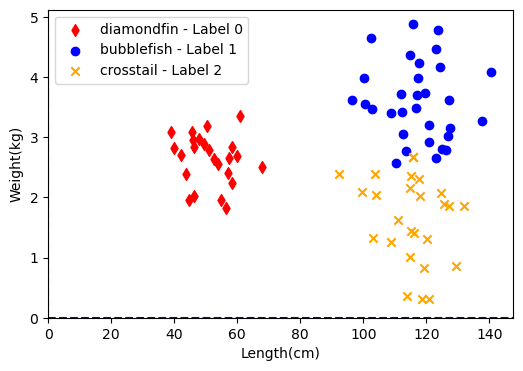

In [12]:
plot2D(X_test, y_test, feature_names, target_names)

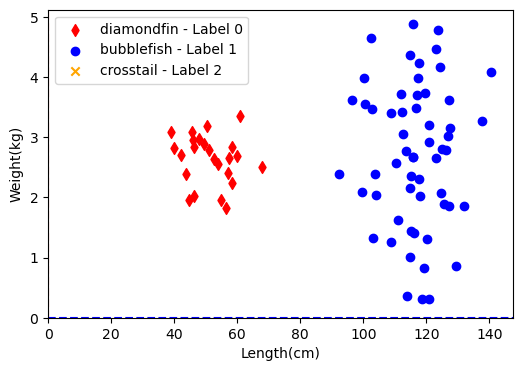

In [19]:
y_pred = my_decision_tree(X_test)
plot2D(X_test, y_pred, feature_names, target_names)

In [20]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the decision tree model: {accuracy:.2f}')

Accuracy of the decision tree model: 0.68


# 2. Decision Tree with Sklearn

### Training step

In [27]:
model = DecisionTreeClassifier(random_state = 42)
#your code here
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

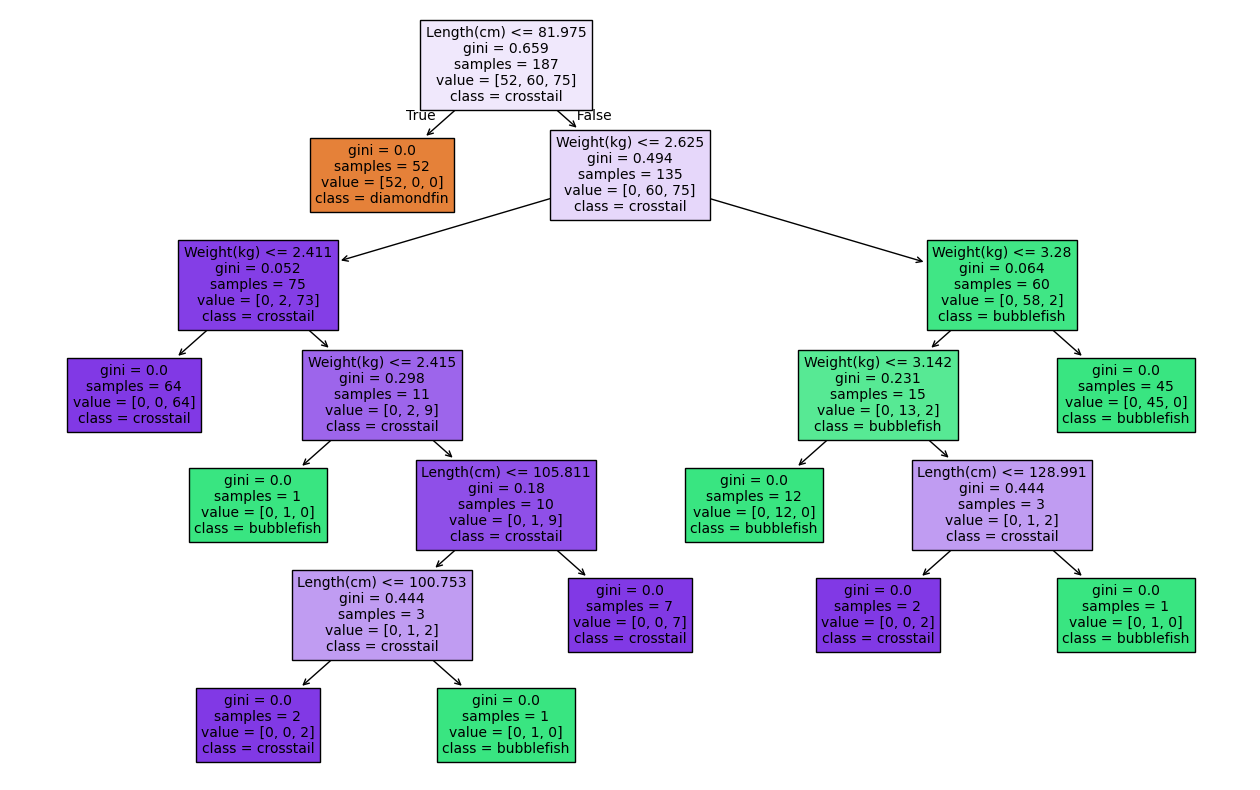

In [28]:
# visualize the tree diagram
plt.figure(figsize=(16,10))
plot_tree(model, filled=True, feature_names=feature_names, class_names=target_names, fontsize=10)
plt.show()

/Users/ramtinabolfazli/Documents/GBC/Fall 2024/Comp 3122 - Data Science/Lab/Week6/util.py:31: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


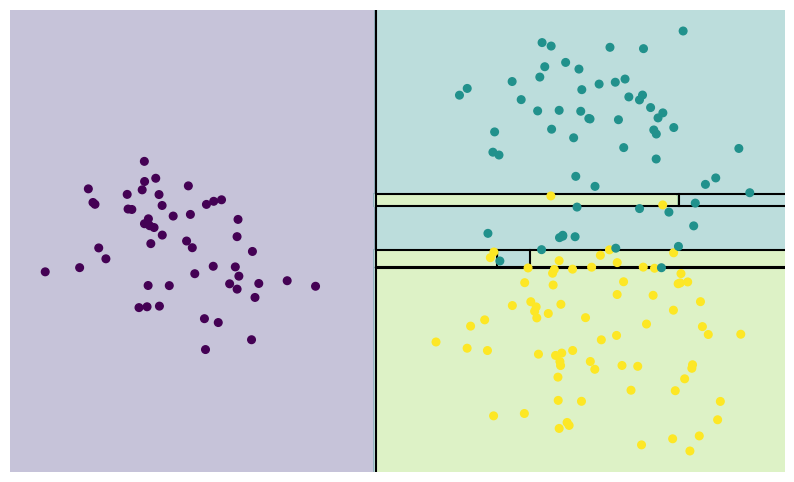

In [29]:
# Visualize the decision boundaries
fig, ax = plt.subplots(figsize=(10, 6))
visualize_tree_boundries(model, X_train, y_train, ax=ax)

### Testing the model

In [26]:
# y_pred = ?

### Confusion Matrix

### identify which labels are predicted correctly and which are not


In [30]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[24,  0,  0],
       [ 0, 28,  3],
       [ 0,  2, 24]])

### Repeat the process above with `DecisionTreeClassifier(max_depth=2)`

In [31]:
#Define and train the mode
dc = DecisionTreeClassifier(max_depth=2)
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)

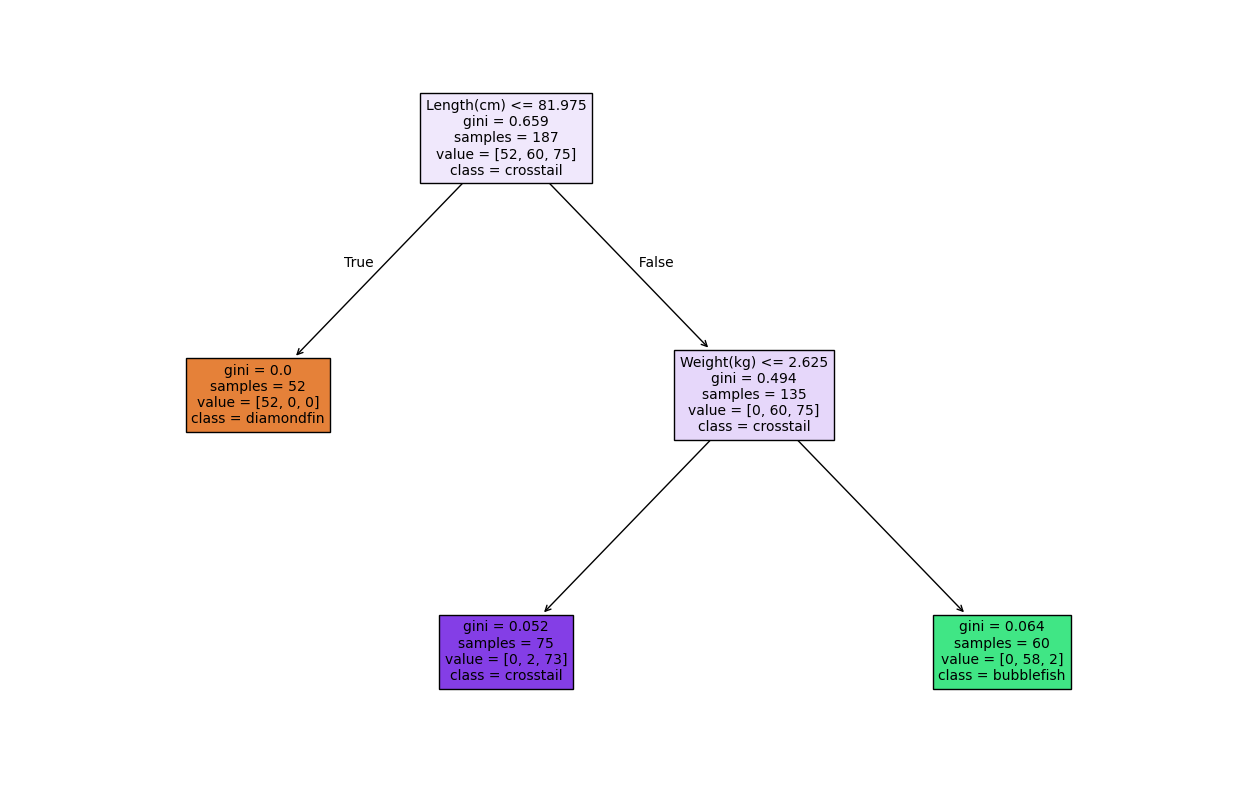

In [36]:
#visualize the decision tree diagram
plt.figure(figsize=(16, 10))
plot_tree(dc, filled=True, feature_names=feature_names, class_names=target_names, fontsize=10)
plt.show()

/Users/ramtinabolfazli/Documents/GBC/Fall 2024/Comp 3122 - Data Science/Lab/Week6/util.py:31: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


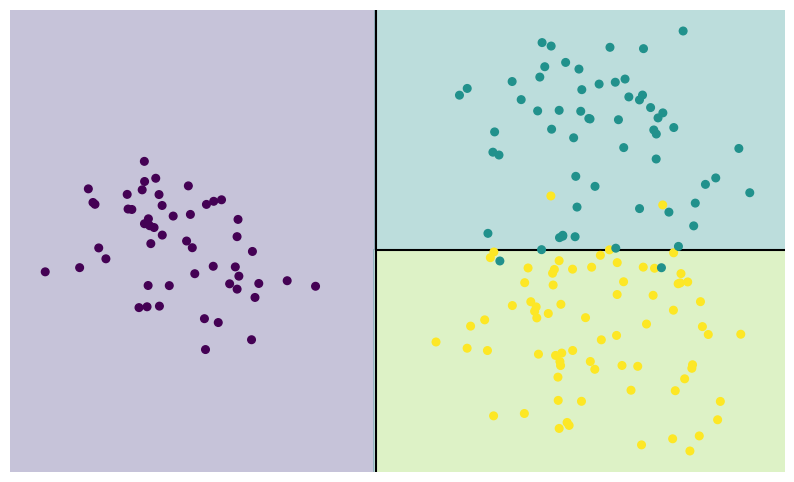

In [39]:
# visualize the decision boundaries
fig, ax = plt.subplots(figsize=(10, 6))
visualize_tree_boundries(dc, X_train, y_train, ax=ax)

In [40]:
# validate the model with the test data; accuracy_score and confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print(f"Accuracy and confusion are: {accuracy} and {confusion}.")

Accuracy and confusion are: 0.9629629629629629 and [[24  0  0]
 [ 0 30  1]
 [ 0  2 24]].


# 3. K Nearest Neighbors - Review

### Implement KNN for K=1

#### Simplified version

#### Use two nested `for` loops to iterate over the `X_test` and `X_train` samples.




- In the outer loop, iterate over the `X_test` and take each sample as a `test_sample`:

    - In the inner loop, iterate over the `X_train` and take each sample as a `train_sample`:
    
        - Calculate the distance between `test_sample` and `train_sample`:
        

        
        - Append the `(distance, index_of_train_sample)` to the `index_distance_pairs` list.

    - Sort the `index_distance_pairs` by distance.
    - Take the first element from the `index_distance_pairs`.
    - Get the label of the first element and append it to the `label_predictions` list.

- report the lables_predictions
        


#### Distance between two points with 2 features

$
        distance(P, Q) = \sqrt{(x0_{P} - x0_Q)^2 + (x1_P - x1_Q)^2}
$

In [2]:
#your code here

#### Calculate the `accuracy_score` and `confusion_matrix` for the KNN model with k=1

In [ ]:
#your code here

### Implement KNN for K=3

#### Which part of the algorithm above should be changed for K=3?

In [ ]:
# your code here